In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bike Sharing Assigment (Linear Regression)
### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# 1) Data understanding preparation and EDA

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.shape

(730, 16)

#### Data has 730 rows and 16 columns

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### -> data has one object i.e date rest are integer or float, all are NON-NULL 

In [7]:
#Converting object to date time format
df['dteday'] = pd.to_datetime(df['dteday'])

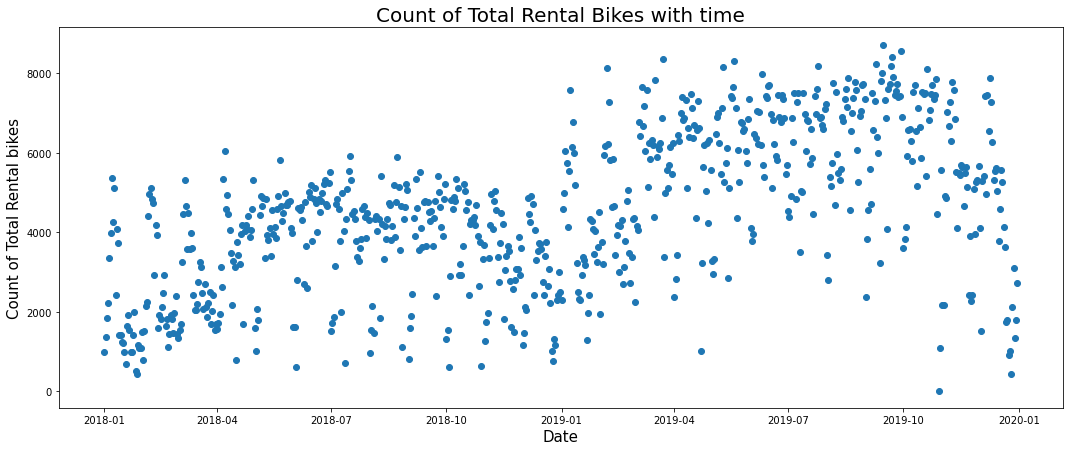

In [8]:
plt.figure(figsize = (18,7))
plt.scatter(x=df['dteday'], y = df['cnt'],marker ='o')
plt.xlabel('Date',size = 15)
plt.ylabel('Count of Total Rental bikes',size = 15)
plt.title('Count of Total Rental Bikes with time',size = 20)
plt.show()


In [9]:
print("% of casual users are - ",round(df['casual'].sum()*100/df['cnt'].sum(),1))
print("% of registered users are - ",round(df['registered'].sum()*100/df['cnt'].sum(),1))

% of casual users are -  18.8
% of registered users are -  81.2


#### -> target columns is 'cnt' i.e count of total rental bikes including both casual and registered
#### -> over the period of 2 years bike rental demand increased in 2019 when compared to 2018
#### -> ~81 % are registerd users, 18% casual users , currently for our data set we ignore both 'registered' and 'casual' column as we are interrested in total count 'cnt'

In [10]:
df['dteday'].nunique()

730

In [11]:
df['instant'].nunique()

730

#### -> Checking for non-unique rows, nunique count of 'instant' & 'dteday' is 730 which is equal to number of rows so 
#### -> data has all unique columns

In [12]:
df = df.drop(columns = ['instant','dteday','casual','registered'])

### Dropping columns:
#### 'instant' as it is just index or ID
#### 'dteday' we have separate columns, day,month,year
#### 'casual & 'registered' as we have target column 'cnt' which is sum of both and is our final target column


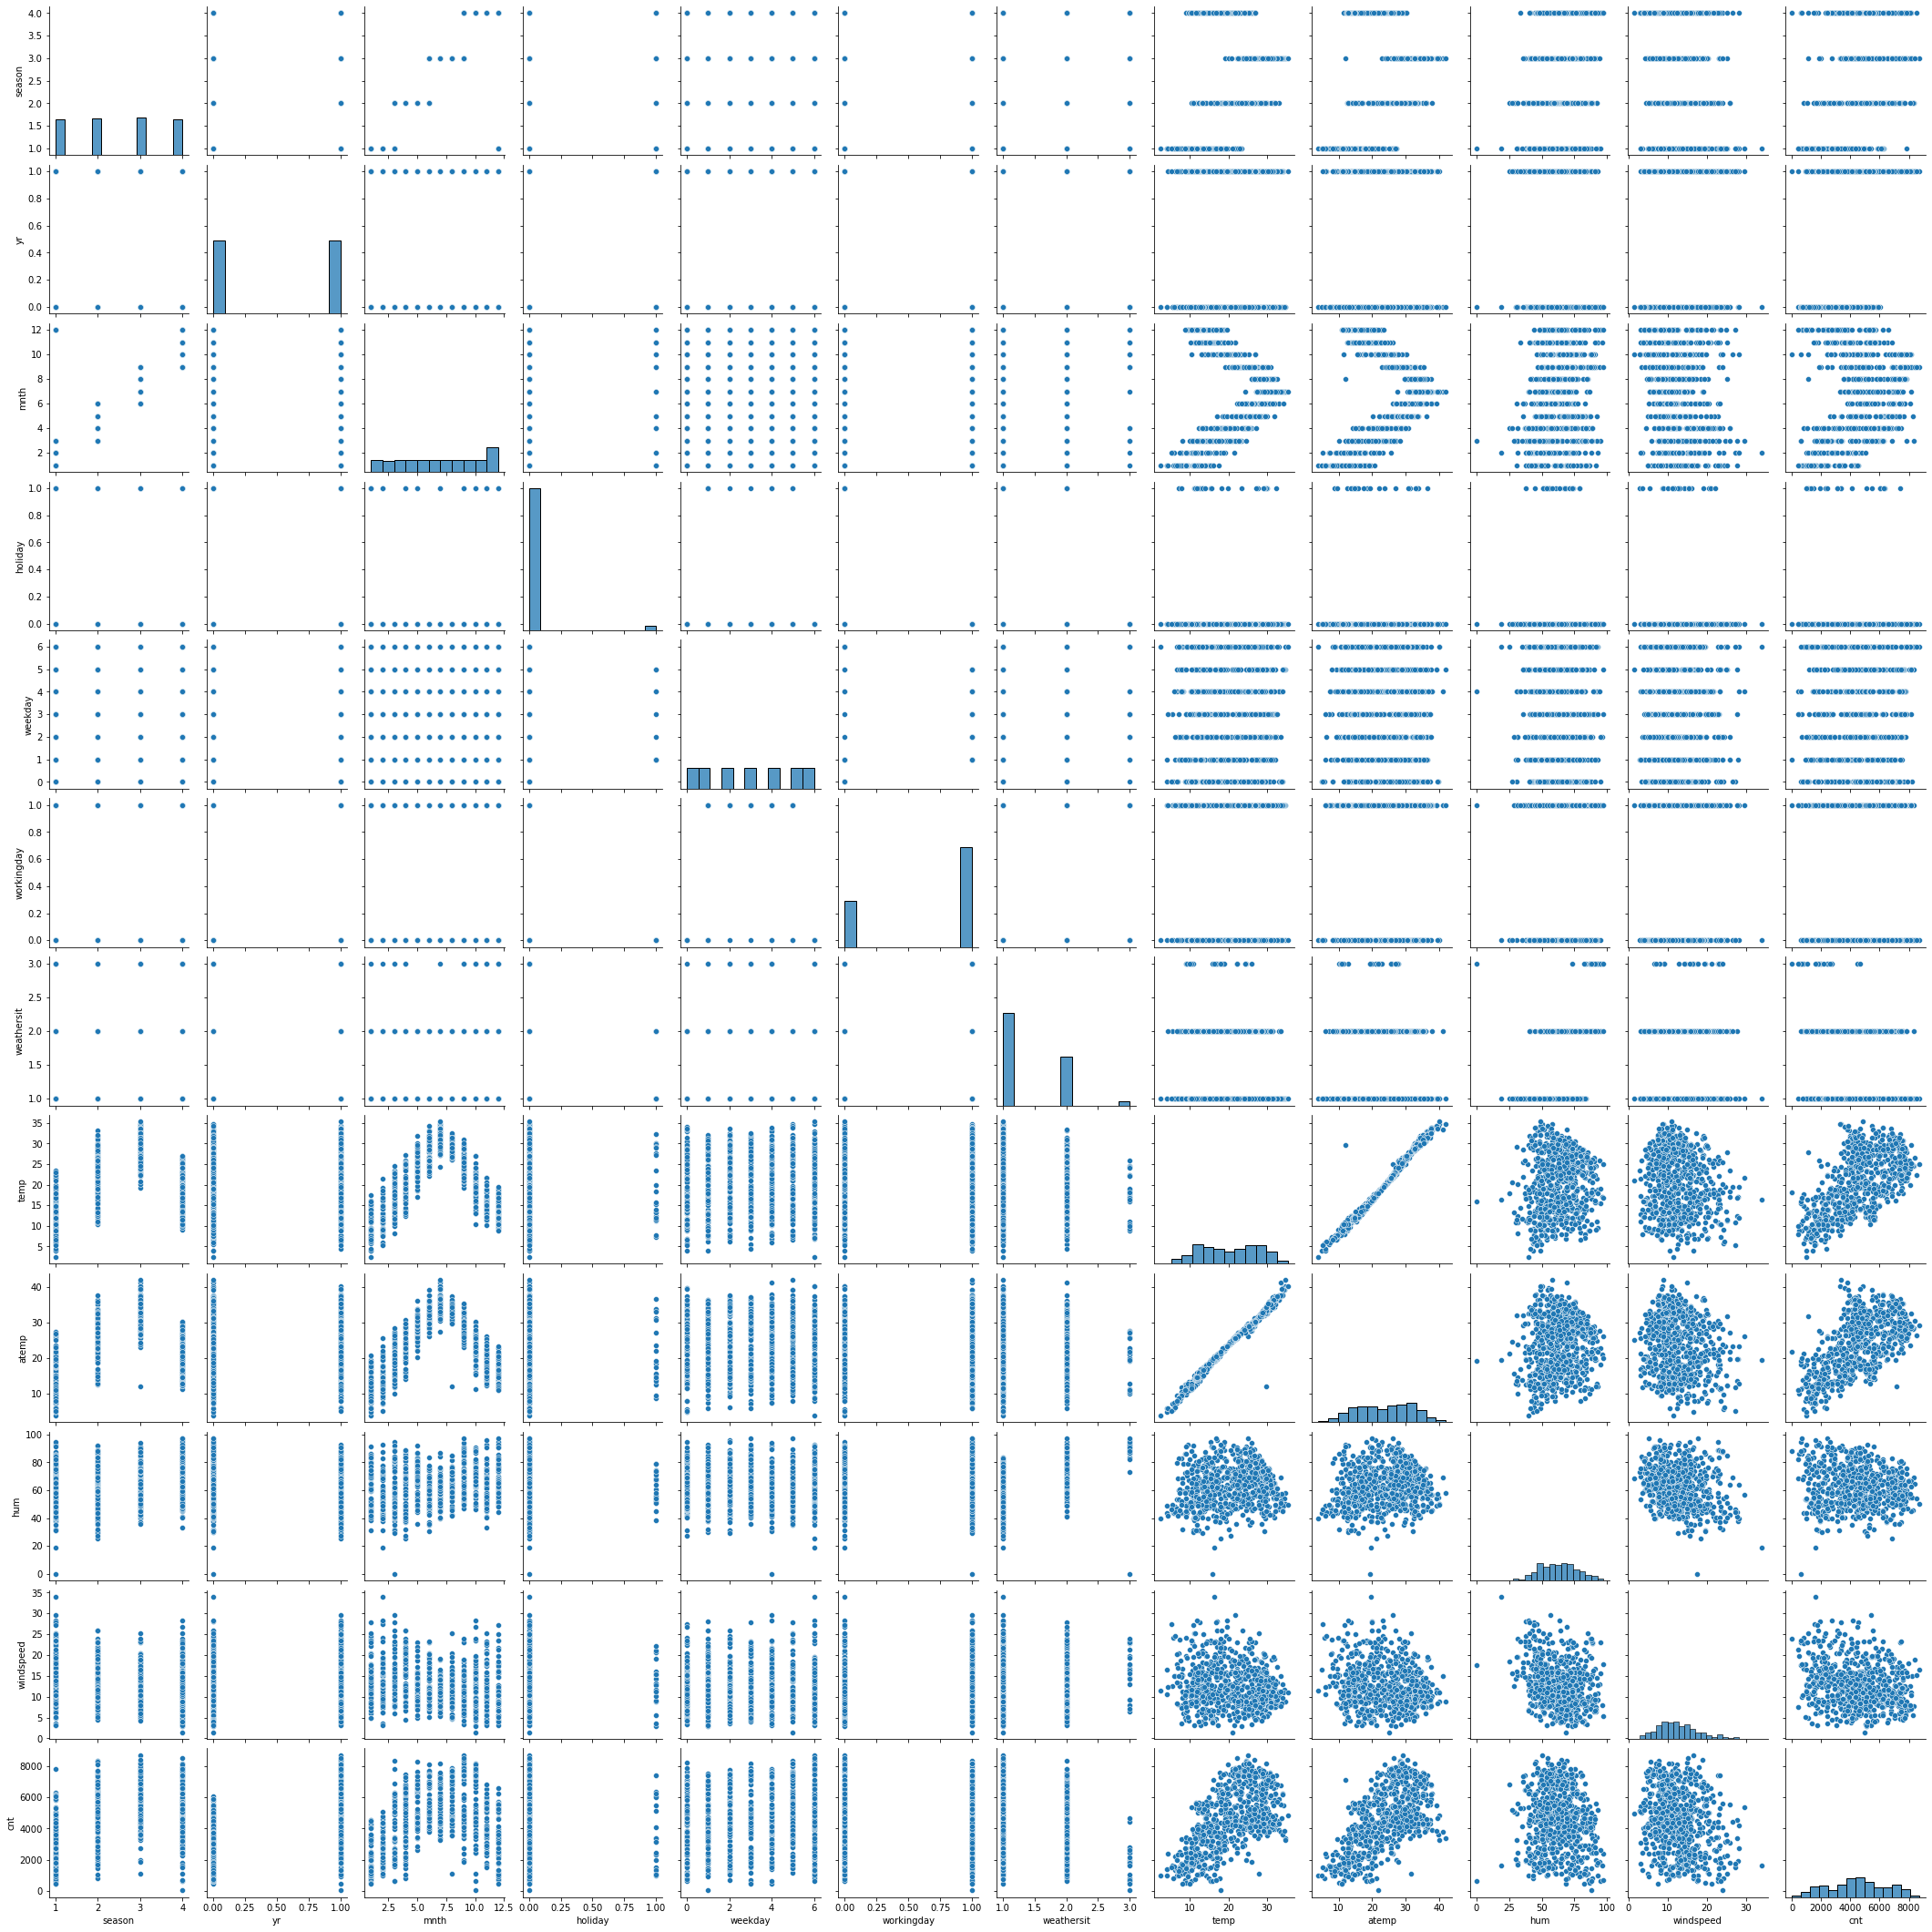

In [13]:
sns.pairplot(df)
plt.show()

### Findings from pair plot
#### we have categorical Variables 'season', 'yr','month','weekday','holiday','working day', 'weathersit'
#### 'yr','holiday','workingday' is either 0 or 1 so no need to convert to dummy variables
#### 'season','weekday','month','weathersit' needs to be converted to categorial and further to dummy variables
#### 'temp' and 'atemp' have linear relationship
#### temp has good linear relation ship with target variable 
#### demand is more in particular months and seasons and weather situations


### -> Converting to categorical variables ('season', 'month','weekday', 'weathersit')

In [14]:
df['season'] = df['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df['mnth'] = df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'Jul', 8:'Aug',9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df['weekday'] = df['weekday'].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
df['weathersit'] = df['weathersit'].replace({1:'Good_weather', 2:'Average_Weather', 3:'Bad_Weather', 4:'Extreme_Weather'})

In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Average_Weather,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Average_Weather,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good_weather,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good_weather,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good_weather,9.305237,11.46350,43.6957,12.522300,1600


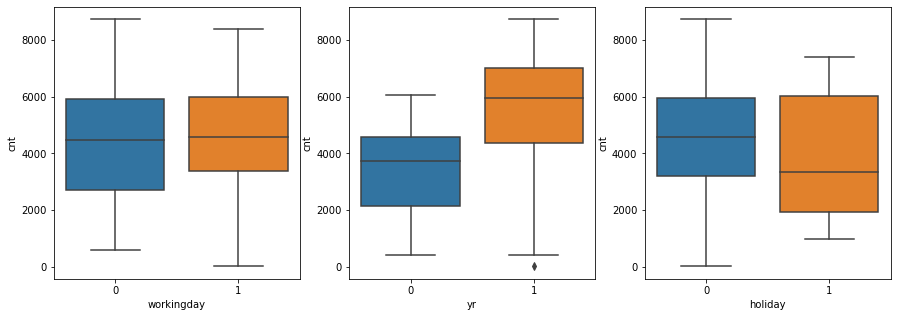

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data = df, x ='workingday', y = 'cnt')
plt.subplot(1,3,2)
sns.boxplot(data = df, x ='yr', y = 'cnt')
plt.subplot(1,3,3)
sns.boxplot(data = df, x ='holiday', y = 'cnt')
plt.show()

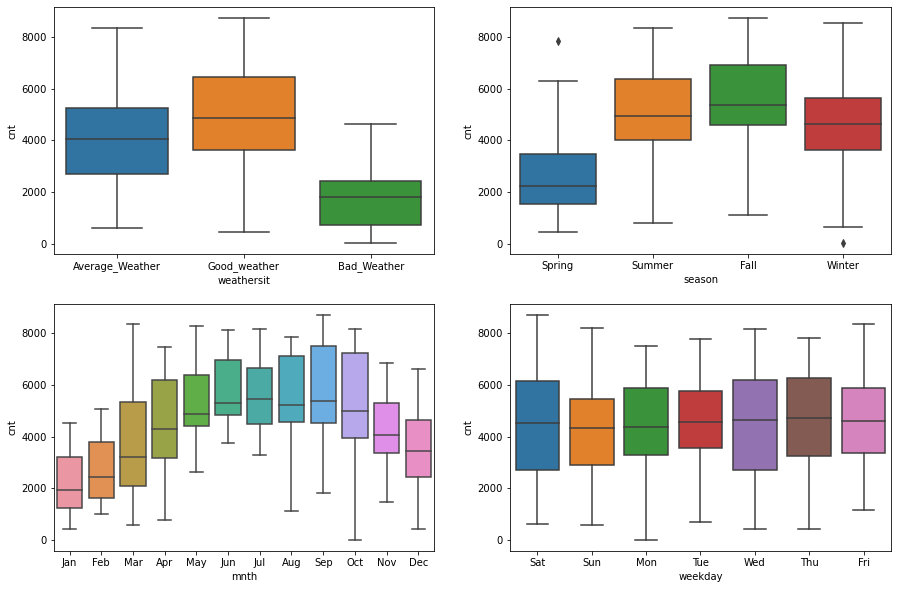

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data = df, x ='weathersit', y = 'cnt')
plt.subplot(2,2,2)
sns.boxplot(data = df, x ='season', y = 'cnt')
plt.subplot(2,2,3)
sns.boxplot(data = df, x ='mnth', y = 'cnt')
plt.subplot(2,2,4)
sns.boxplot(data = df, x ='weekday', y = 'cnt')
plt.show()

### Inferences from categorical variables
#### 2019 had more rental comapred to 2018
#### holiday number of users decrease
#### weather plays important role, as weather gets good number of rentals increase
#### rentals of bike is seasonal with it increases during summer and fall and decreases during winter and spring, similarly with month it varies
#### Not much correlation with day of week

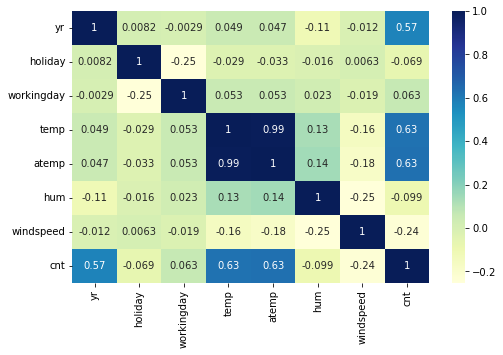

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### -> temp and a temp has correllation of 0.99 we need to drop one of them 
#### rental count is correlated to temperature, yr and negatively correlated to wind speed
#### humidity and windspeed are negatively correlated

Text(0.5, 1.0, 'temp vs Atemp')

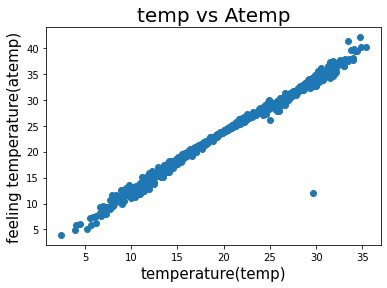

In [19]:
plt.scatter(x=df['temp'], y=df['atemp'],marker='o')
plt.xlabel('temperature(temp)',size = 15)
plt.ylabel('feeling temperature(atemp)',size = 15)
plt.title('temp vs Atemp',size = 20)

In [20]:
###Droppping 'atemp' column
df = df.drop(columns = 'atemp')

### -> Creating Dummy variables ('season', 'month','weekday', 'weathersit')

In [21]:
dummy = df[['season','mnth','weekday','weathersit']]

In [22]:
dummy = pd.get_dummies(dummy,drop_first = True)

In [23]:
### merging original and dummy dataframe
df = pd.concat([df,dummy],axis = 1)

In [24]:
### dropping original columns for which dummies are created
df = df.drop(columns = ['season','mnth','weekday','weathersit'])

In [25]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad_Weather,weathersit_Good_weather
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [26]:
df.shape

(730, 29)

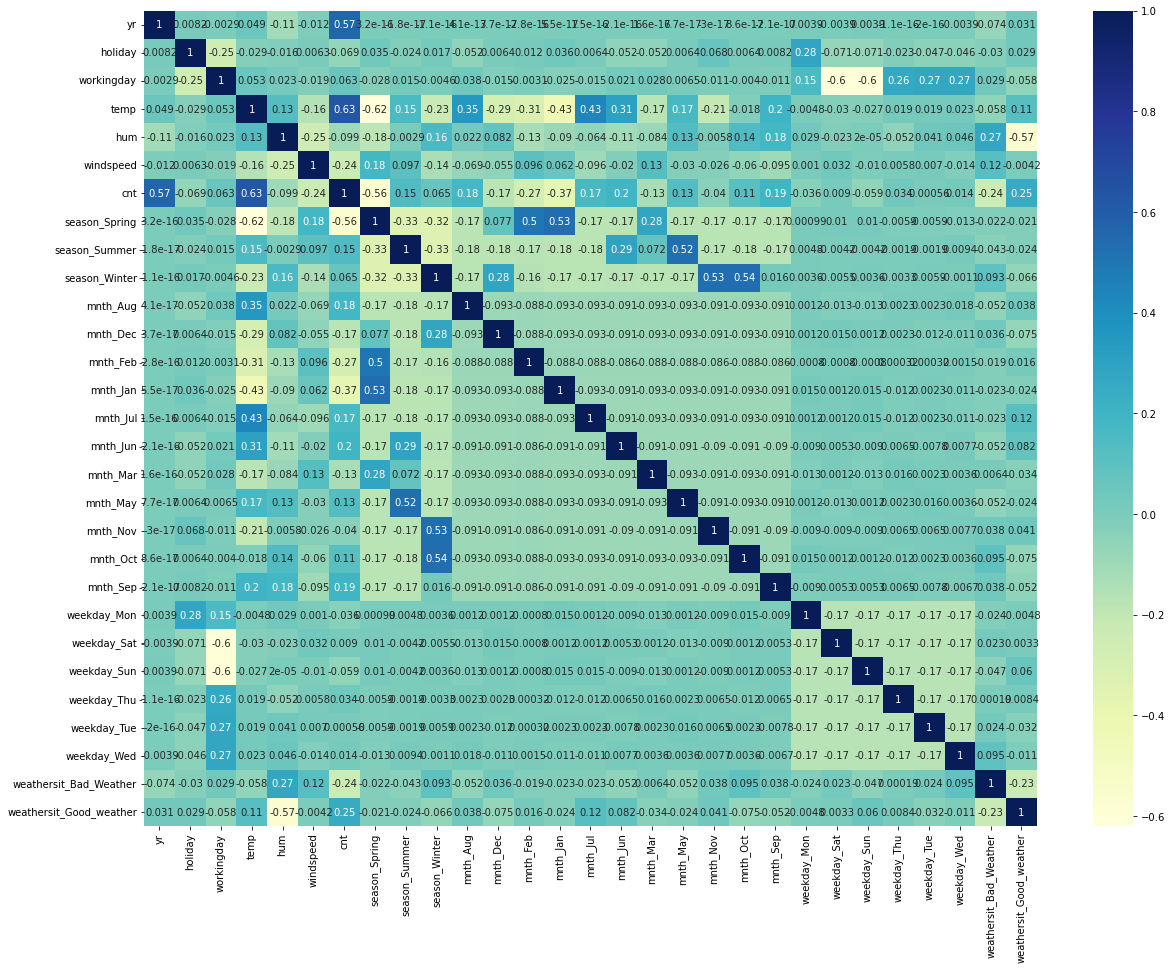

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### -> Splitting into train and test data
#### 70% training data nd 30% test data

In [28]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [29]:
print("train data shape:", df_train.shape)
print("test data shape:", df_test.shape)

train data shape: (510, 29)
test data shape: (220, 29)


### -> Scaling numerical Features in train data set
#### using min max scaler - normalization

In [30]:
num_var = ['temp','hum','windspeed','cnt']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [31]:
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [32]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad_Weather,weathersit_Good_weather
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.625490
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.484471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### now min and max of numerical features is 0 & 1, infact all features and target have min = 0 and max = 1
## -> now training data is ready for modelling

# 2) Model building (Multiple linear regression)

#### splitting training dataset to X and Y

In [33]:
y_train = df_train['cnt']
X_train = df_train.drop(columns = 'cnt')

### Since we have 28 features and 1 target , we will use RFE (Recursive feature ellimination) to get to important 15 features

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [36]:
rfe = RFE(LR,15)
rfe = rfe.fit(X_train,y_train)

In [37]:
list(zip(X_train.columns,rfe.ranking_,rfe.support_))

[('yr', 1, True),
 ('holiday', 1, True),
 ('workingday', 1, True),
 ('temp', 1, True),
 ('hum', 1, True),
 ('windspeed', 1, True),
 ('season_Spring', 1, True),
 ('season_Summer', 1, True),
 ('season_Winter', 1, True),
 ('mnth_Aug', 7, False),
 ('mnth_Dec', 4, False),
 ('mnth_Feb', 5, False),
 ('mnth_Jan', 2, False),
 ('mnth_Jul', 1, True),
 ('mnth_Jun', 13, False),
 ('mnth_Mar', 14, False),
 ('mnth_May', 6, False),
 ('mnth_Nov', 3, False),
 ('mnth_Oct', 8, False),
 ('mnth_Sep', 1, True),
 ('weekday_Mon', 9, False),
 ('weekday_Sat', 1, True),
 ('weekday_Sun', 1, True),
 ('weekday_Thu', 11, False),
 ('weekday_Tue', 10, False),
 ('weekday_Wed', 12, False),
 ('weathersit_Bad_Weather', 1, True),
 ('weathersit_Good_weather', 1, True)]

### list of 15 important features

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Bad_Weather',
       'weathersit_Good_weather'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### using stats model and VIF

In [40]:
import statsmodels.api as sm
def linearmodel_stats(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train,X_train_sm).fit()
    print(lr.summary())
    return lr

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(cols):
    vif = pd.DataFrame()
    vif['features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)


### Model 1
#### Starting with features suggested by RFE

In [42]:
cols1 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed','season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul','mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Bad_Weather','weathersit_Good_weather']
linearmodel_stats(cols1)
vif(cols1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.11e-191
Time:                        12:09:53   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,features,VIF
2,workingday,61.47
11,weekday_Sat,14.63
12,weekday_Sun,14.25
6,season_Spring,5.02
3,temp,3.62
8,season_Winter,3.49
1,holiday,3.36
7,season_Summer,2.62
4,hum,1.91
14,weathersit_Good_weather,1.63


#### Ellimianting feature:'holiday' as it has high P value

### Model 2
#### manual ellimination of Feature: 'holiday'

In [43]:
cols2 = ['yr', 'workingday', 'temp', 'hum', 'windspeed','season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul','mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Bad_Weather','weathersit_Good_weather']
linearmodel_stats(cols2)
vif(cols2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.11e-191
Time:                        12:09:53   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,features,VIF
3,hum,28.10
2,temp,20.59
1,workingday,19.35
5,season_Spring,5.17
10,weekday_Sat,5.12
11,weekday_Sun,5.00
4,windspeed,4.87
7,season_Winter,3.92
13,weathersit_Good_weather,3.63
6,season_Summer,3.12


#### Ellimianting feature:'hum' as it has high VIF

### Model 3
#### manual ellimination of Feature: 'hum' humidity

In [44]:
cols3 = ['yr', 'workingday', 'temp', 'windspeed','season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul','mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Bad_Weather','weathersit_Good_weather']
linearmodel_stats(cols3)
vif(cols3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.28e-188
Time:                        12:09:53   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,features,VIF
1,workingday,15.86
2,temp,13.31
3,windspeed,4.78
9,weekday_Sat,4.38
10,weekday_Sun,4.18
4,season_Spring,3.90
12,weathersit_Good_weather,2.85
6,season_Winter,2.80
5,season_Summer,2.76
0,yr,2.07


#### Ellimianting feature:'working' as it has high VIF

### Model 4
#### manual ellimination of Feature: 'working day'

In [45]:
cols4 = ['yr', 'temp', 'windspeed','season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul','mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Bad_Weather','weathersit_Good_weather']
linearmodel_stats(cols4)
vif(cols4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.06e-186
Time:                        12:09:53   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,features,VIF
1,temp,5.83
2,windspeed,4.65
11,weathersit_Good_weather,2.84
4,season_Summer,2.20
3,season_Spring,2.16
0,yr,2.07
5,season_Winter,1.80
6,mnth_Jul,1.59
7,mnth_Sep,1.32
8,weekday_Sat,1.22


#### Ellimianting feature:'weekday_Sat as it has high p value
### from business understading 'temp' is important also from heatmap temp was important so not elliminating temp also VIF is close to 5 so ok

### Model 5
#### manual ellimination of Feature: 'weekday_Sat '

In [46]:
cols5 = ['yr', 'temp', 'windspeed','season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul','mnth_Sep', 'weekday_Sun', 'weathersit_Bad_Weather','weathersit_Good_weather']
linearmodel_stats(cols5)
vif(cols5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.37e-187
Time:                        12:09:53   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,features,VIF
1,temp,5.79
2,windspeed,4.62
10,weathersit_Good_weather,2.84
4,season_Summer,2.20
3,season_Spring,2.13
0,yr,2.07
5,season_Winter,1.78
6,mnth_Jul,1.59
7,mnth_Sep,1.32
8,weekday_Sun,1.18


#### Ellimianting feature:'temp' as it has high p value
### from business understading 'temp' is important let us see 

### Model 6
#### manual ellimination of Feature: 'temp'

In [47]:
cols6 = ['yr', 'windspeed','season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul','mnth_Sep', 'weekday_Sun', 'weathersit_Bad_Weather','weathersit_Good_weather']
linearmodel_stats(cols6)
vif(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          4.80e-149
Time:                        12:09:53   Log-Likelihood:                 406.20
No. Observations:                 510   AIC:                            -790.4
Df Residuals:                     499   BIC:                            -743.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,features,VIF
1,windspeed,4.02
9,weathersit_Good_weather,2.46
2,season_Spring,2.09
3,season_Summer,2.02
0,yr,1.87
4,season_Winter,1.76
5,mnth_Jul,1.30
7,weekday_Sun,1.17
6,mnth_Sep,1.14
8,weathersit_Bad_Weather,1.11


### dropping temperature caused r2 and adj r2 to drop significantly from 0.84 to 0.76 that was significant
### also from business understanding and EDA temp is important 
### retaining temp

### Model 7
#### Retaning of Feature: 'temp'

In [48]:
cols7 = ['temp','yr', 'windspeed','season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul','mnth_Sep', 'weekday_Sun', 'weathersit_Bad_Weather','weathersit_Good_weather']
linearmodel_stats(cols7)
vif(cols7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.37e-187
Time:                        12:09:53   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,features,VIF
0,temp,5.79
2,windspeed,4.62
10,weathersit_Good_weather,2.84
4,season_Summer,2.20
3,season_Spring,2.13
1,yr,2.07
5,season_Winter,1.78
6,mnth_Jul,1.59
7,mnth_Sep,1.32
8,weekday_Sun,1.18


In [49]:
cols_final = ['temp','yr', 'windspeed','season_Spring', 'season_Summer', 'season_Winter','mnth_Sep','mnth_Jul', 'weekday_Sun', 'weathersit_Bad_Weather','weathersit_Good_weather']
X_train_sm = sm.add_constant(X_train[cols_final])
lr_final = sm.OLS(y_train,X_train_sm).fit()
print(lr_final.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.37e-187
Time:                        12:09:53   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [50]:
vif = pd.DataFrame()
vif['features'] = X_train[cols_final].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_final].values, i) for i in range(X_train[cols_final].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,temp,5.79
2,windspeed,4.62
10,weathersit_Good_weather,2.84
4,season_Summer,2.20
3,season_Spring,2.13
1,yr,2.07
5,season_Winter,1.78
7,mnth_Jul,1.59
6,mnth_Sep,1.32
8,weekday_Sun,1.18


In [51]:
lr_final.params

const                      0.123150
temp                       0.491742
yr                         0.233876
windspeed                 -0.149694
season_Spring             -0.068197
season_Summer              0.047885
season_Winter              0.081830
mnth_Sep                   0.072321
mnth_Jul                  -0.048253
weekday_Sun               -0.044959
weathersit_Bad_Weather    -0.204417
weathersit_Good_weather    0.080237
dtype: float64

### model is ok to go as P-values of rest of features is less than 0.05 and VIF value is <5 also ok, we will move forward test model with thease features
### R2 value is 0.836 on train data
### overal model fit is good as Prob (F-statistic) is very low or insignificant

# 3) Residual Analysis of model  on train data

In [52]:
y_train_pred = lr_final.predict(X_train_sm)

In [53]:
residual = y_train - y_train_pred

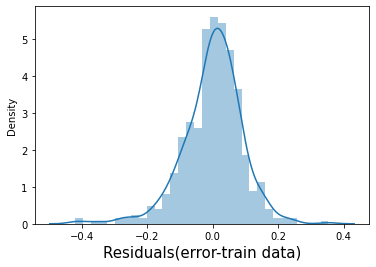

In [54]:
sns.distplot(residual)
plt.xlabel("Residuals(error-train data)", size = 15)
plt.show()

#### -> Error term for train data has normal distribution

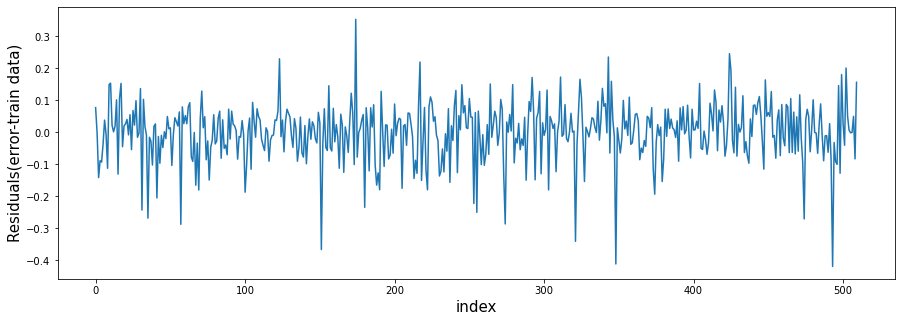

In [55]:
plt.figure(figsize=(15,5))
plt.plot([i for i in range(len(X_train_sm))],residual)
plt.xlabel("index", size = 15)
plt.ylabel("Residuals(error-train data)", size = 15)
plt.show()

#### -> Error term for train data seems to be independent, no cyclicity

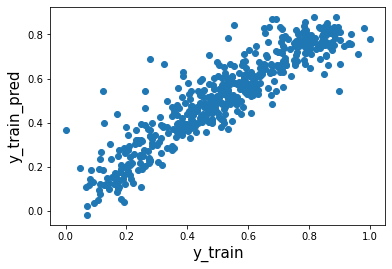

In [56]:

plt.scatter(y_train,y_train_pred)
plt.xlabel("y_train", size = 15)
plt.ylabel("y_train_pred", size = 15)
plt.show()

#### -> Error term for train data seems to have constant variance

# 4) Analysis of model  on TEST data

In [57]:
num_var = ['temp','hum','windspeed','cnt']
df_test[num_var] = scaler.transform(df_test[num_var])

#### for test data we. use only transform not fit_transform
#### data is already scaled on train data and we obtained coeff based on that

In [58]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad_Weather,weathersit_Good_weather
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.654545
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.476601
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
y_test = df_test['cnt']
X_test = df_test.drop(columns = 'cnt')


In [60]:
### adding constant
X_test_sm = sm.add_constant(X_test[cols_final])


In [61]:
y_test_pred = lr_final.predict(X_test_sm)

In [62]:
residual_test = y_test - y_test_pred

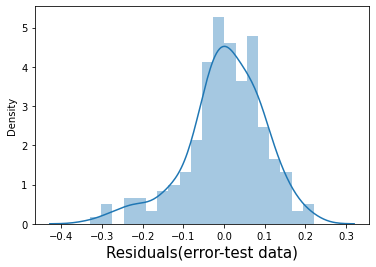

In [63]:
sns.distplot(residual_test, bins = 20)
plt.xlabel("Residuals(error-test data)", size = 15)
plt.show()

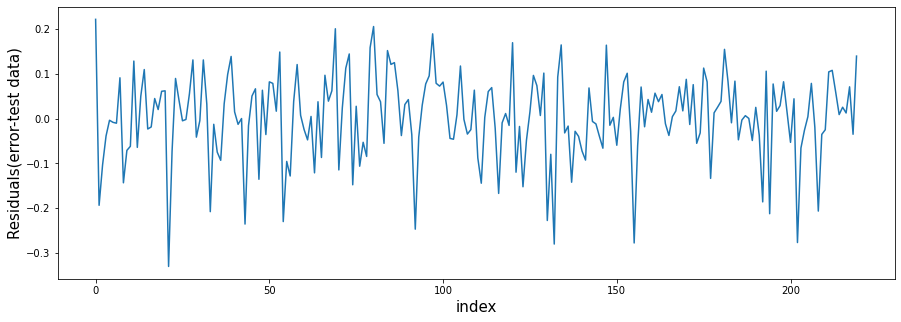

In [64]:
plt.figure(figsize=(15,5))
plt.plot([i for i in range(len(X_test_sm))],residual_test)
plt.xlabel("index", size = 15)
plt.ylabel("Residuals(error-test data)", size = 15)
plt.show()

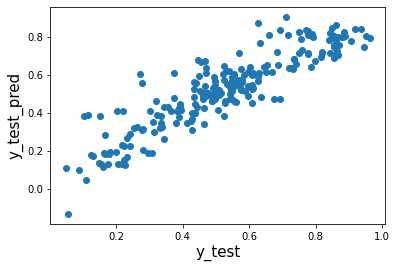

In [65]:

plt.scatter(y_test,y_test_pred)
plt.xlabel("y_test", size = 15)
plt.ylabel("y_test_pred", size = 15)
plt.show()

#### -> Error term for test data has normal distribution
#### -> Error term for test data seems to be independent
#### -> Error term for test data seems to have constant variance


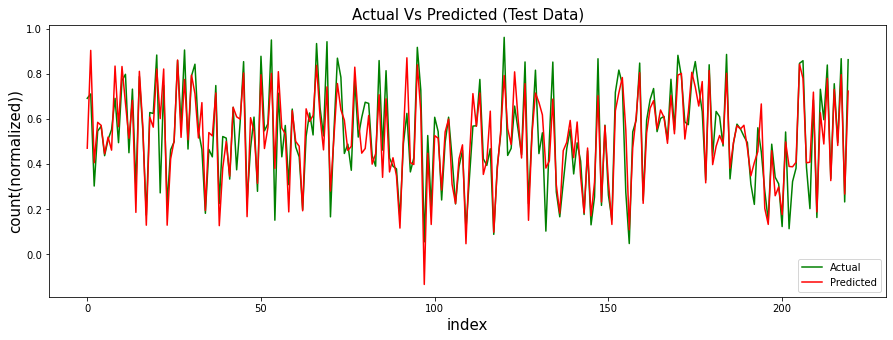

In [66]:
plt.figure(figsize=(15,5))
plt.plot([i for i in range(len(X_test_sm))],y_test, color = 'g')
plt.plot([i for i in range(len(X_test_sm))],y_test_pred, color = 'r')
plt.xlabel("index", size = 15)
plt.ylabel("count(normalized))", size = 15)
plt.title("Actual Vs Predicted (Test Data)", size = 15)
plt.legend(["Actual", "Predicted"], loc ="lower right")
plt.show()


### Actual vs Predicted has good match, model is able to capture increase and decrease

In [67]:
from sklearn.metrics import r2_score
print("r2 score on test data :",round(r2_score(y_true = y_test,y_pred = y_test_pred),2))
print("r2 score on test data :",round(r2_score(y_true = y_train,y_pred = y_train_pred),2))

r2 score on test data : 0.81
r2 score on test data : 0.84


### R2 score of train and test data set is close

In [68]:
round(lr_final.params,3)

const                      0.123
temp                       0.492
yr                         0.234
windspeed                 -0.150
season_Spring             -0.068
season_Summer              0.048
season_Winter              0.082
mnth_Sep                   0.072
mnth_Jul                  -0.048
weekday_Sun               -0.045
weathersit_Bad_Weather    -0.204
weathersit_Good_weather    0.080
dtype: float64

## Conclusion
### Final Equation (Multiple Linear Regression)
### cnt (Rental count) = 0.123  + 0.492 * temp + 0.234 * yr - 0.204 * weathersit_Bad(light snow/rain) - 0.150 * windspeed + 0.082 * season_winter + 0.080 * weathersit_good(clear) + 0.072 * mnth_Sep - 0.068 * season_spring + 0.048 * season_summer - 0.048 * mnth_Jul - 0.045 * Weekday_Sun

## Observations from model
### >>> top 3 featured effecting bike rentals are
#### --> temperature: if temperature is higher then bike rentals increase
#### --> if weather situation is light snow/rain then bike rentals decrease
#### --> yearly demand is increasing so coming years post pandemic we can expect more bike rental
### company can take help of weather and temperature predictions and arrange for more bikes when weather is good and temperature is high, and company can utilize days when weather situation is bad to serivice bikes and keep bikes ready
### >>> few other observations
#### when windspeed is lower then rental increase
#### in summer season demand is most so during spring company can utilize time for servicing bike
#### september is the time with high demand
#### when weather situation is extreme i.e heavy rain , thunderstorm no one rents bikes at all, can look for giving leave to staff on these days

